In [1]:
import matplotlib.pyplot as plt
import numpy as np
from WooferConfig import WOOFER_CONFIG
import quaternion
%matplotlib notebook
plt.rcParams['figure.figsize'] = (14,8)

In [2]:
data = np.load('falling_brick_state_log.npz')['arr_0']
est = np.load('falling_brick_state_est_log.npz')['arr_0']

n = np.shape(est)[1] - 1

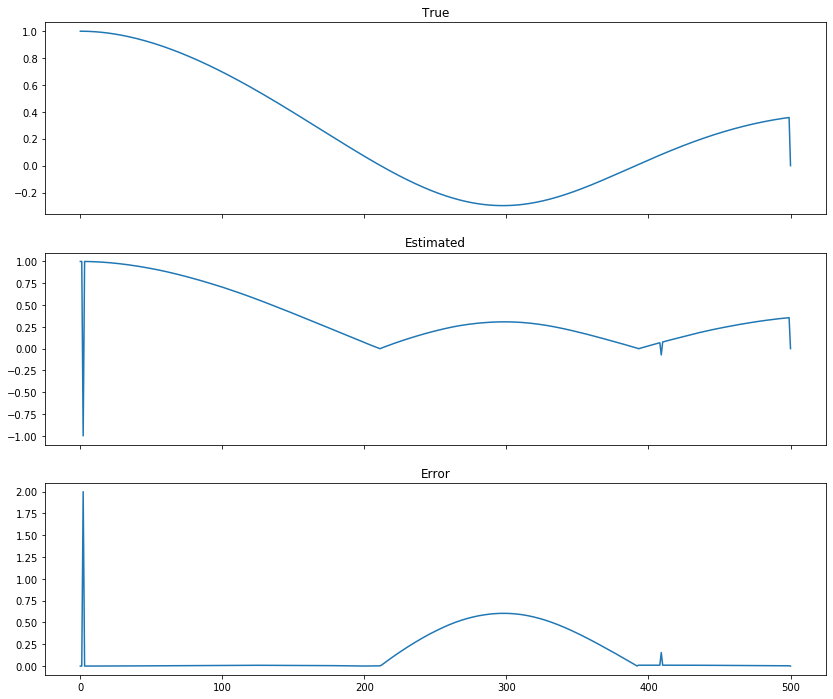

In [3]:
fig, (ax1, ax2,ax3) = plt.subplots(nrows=3, sharex=True)
x_true = data[3,:]
l1 = ax1.plot(x_true)
ax1.set_title('True')

x_est = est[3,:]

l2 = ax2.plot(x_est)
ax2.set_title('Estimated')

p_diff = np.abs(x_true - x_est)
l3 = ax3.plot(p_diff)
ax3.set_title('Error')


fig.set_size_inches(14,12)
plt.show()

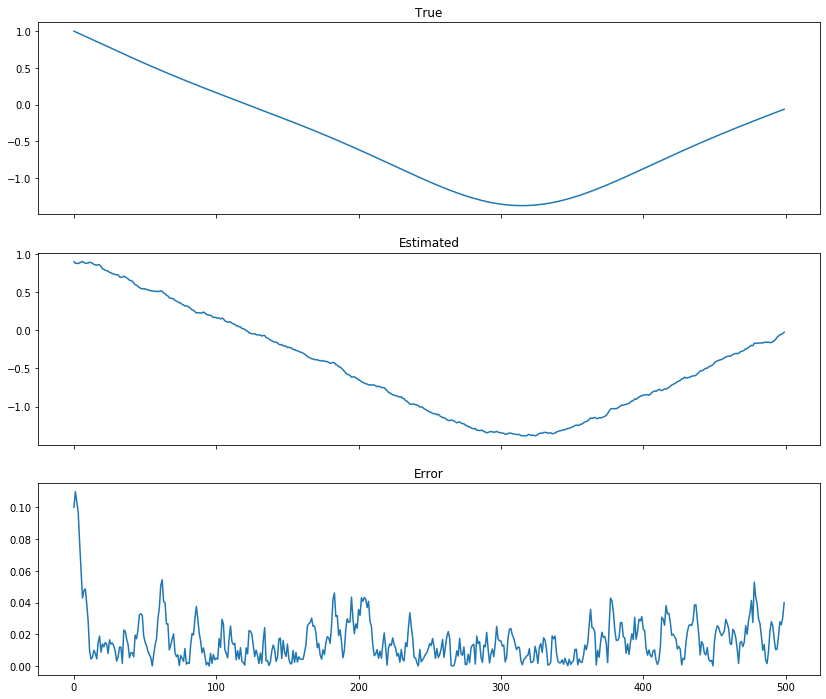

In [4]:
fig, (ax1, ax2,ax3) = plt.subplots(nrows=3, sharex=True)
x_true = data[12,:n]
l1 = ax1.plot(x_true)
ax1.set_title('True')

x_est = est[12,:n]

l2 = ax2.plot(x_est)
ax2.set_title('Estimated')

p_diff = np.abs(x_est - x_true)
l3 = ax3.plot(p_diff)
ax3.set_title('Error')


fig.set_size_inches(14,12)
plt.show()

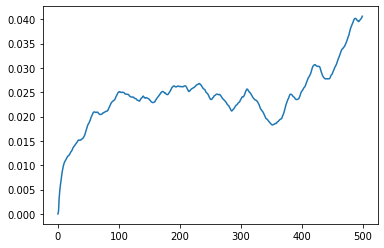

In [5]:
# find the quaternion error
l = n

phi = np.zeros(l)
for i in range(l):
    q_i_est = est[3:7,i]
    q_i_true = data[3:7,i]
    
    q_d = quaternion.prod(quaternion.inv(q_i_est), q_i_true)
    phi[i] = np.linalg.norm(quaternion.log(q_d))
    phi[i] = np.abs(( phi[i] + np.pi) % (2 * np.pi ) - np.pi)
    
fig, ax = plt.subplots()

line1, = ax.plot(phi)

plt.show()
    

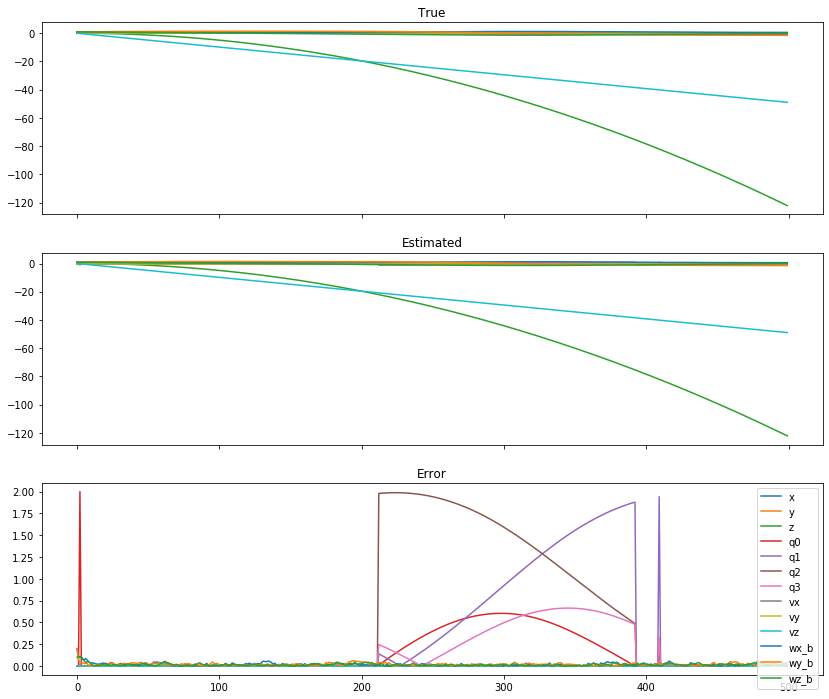

In [6]:
fig, (ax1, ax2,ax3) = plt.subplots(nrows=3, sharex=True)
x_true = data[:,:n]
l1 = ax1.plot(x_true.T)
ax1.set_title('True')

x_est = est[:,:n]

l2 = ax2.plot(x_est.T)
ax2.set_title('Estimated')

p_diff = np.abs(x_est - x_true)
l3 = ax3.plot(p_diff.T)
ax3.set_title('Error')


fig.set_size_inches(14,12)
plt.legend(('x','y','z','q0','q1','q2','q3','vx','vy', 'vz', 'wx_b', 'wy_b', 'wz_b'))
plt.show()
